In [1]:
import pickle
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D,MaxPool2D
from keras import backend as K
import numpy as np
import tensorflow as tf
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


# Unpickling trainX and trainY

In [3]:
pickle_trainX=open("trainX.pickle","rb")
pickle_trainY=open("trainY.pickle","rb")

In [4]:
x_train=pickle.load(pickle_trainX)
y_train=pickle.load(pickle_trainY)

In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# Splitting

In [7]:
from sklearn.model_selection import train_test_split

#split the train and the validation set
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=2)


In [8]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (48000, 28, 28)
x_test (12000, 28, 28)
y_train (48000,)
y_test (12000,)


# Total labels

In [9]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Visualisation

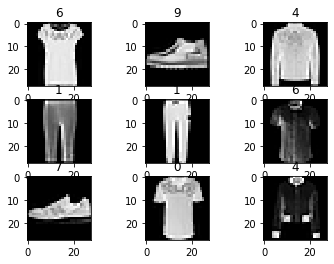

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

for i in range(0,9):
    plt.subplot(330+(i+1))
    plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

# Normalising

In [11]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

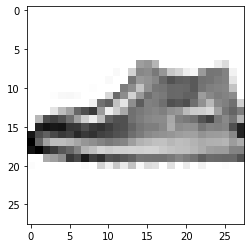

In [12]:
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

# One-hot encoding

In [13]:
img_rows,img_cols=28,28

In [14]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [15]:
print(x_train.shape,x_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)


In [16]:
input_shape

(28, 28, 1)

In [17]:
batch_size=128
num_classes=10
epochs=30

In [18]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

print('X_train shape:',x_train.shape)
print('X_test shape:', x_test.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

X_train shape: (48000, 28, 28, 1)
X_test shape: (12000, 28, 28, 1)
48000 train samples
12000 test samples


# Model

In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          4624      
__________

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
check = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True,save_weights_only=False,
                     mode='auto', period=1)
newmodel = model.fit(x_train, y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data = (x_test, y_test),
         callbacks=[check])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test_loss :', score[0])
print('Test_accuracy :', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 43s 903us/step - loss: 0.6015 - acc: 0.7772 - val_loss: 0.4604 - val_acc: 0.8310

Epoch 00001: val_loss improved from inf to 0.46043, saving model to model.h5
Epoch 2/30
48000/48000 [==============================] - 42s 877us/step - loss: 0.4648 - acc: 0.8303 - val_loss: 0.4019 - val_acc: 0.8532

Epoch 00002: val_loss improved from 0.46043 to 0.40191, saving model to model.h5
Epoch 3/30
48000/48000 [==============================] - 43s 891us/step - loss: 0.4174 - acc: 0.8472 - val_loss: 0.3783 - val_acc: 0.8586

Epoch 00003: val_loss improved from 0.40191 to 0.37832, saving model to model.h5
Epoch 4/30
48000/48000 [==============================] - 44s 908us/step - loss: 0.3840 - acc: 0.8576 - val_loss: 0.3538 - val_acc: 0.8678

Epoch 00004: val_loss improved from 0.37832 to 0.35375, saving model to model.h5
Epoch 5/30
48000/48000 [==============================] - 43s 892us/st

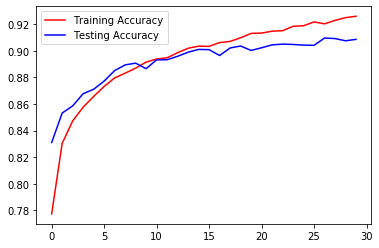

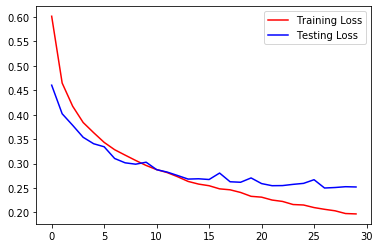

In [25]:
plt.figure()
plt.plot(newmodel.history['acc'], 'r', label='Training Accuracy')
plt.plot(newmodel.history['val_acc'], 'b', label='Testing Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(newmodel.history['loss'], 'r', label='Training Loss')
plt.plot(newmodel.history['val_loss'], 'b', label='Testing Loss')
plt.legend()
plt.show()

# Predictions for the testX file

In [26]:
pickle_testX = open("testX.pickle","rb")
testX = pickle.load(pickle_testX)

In [27]:
print(testX.shape)

(10000, 28, 28)


In [28]:
testX = testX.astype('float32')
testX /= 255
testX = testX.reshape(10000,28,28,1)

In [29]:
y_pred = model.predict_classes(testX)

# Writing prediction results to output.pickle file

In [30]:
with open('output.pickle','wb') as f:
    pickle.dump(y_pred,f)